# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Twitter_Data.csv')  # Replace with your actual file path
# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Display class distribution
print(df['clean_text'].value_counts())


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
clean_text    4
category      7
dtype: int64
clean_text
have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for                         1
when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples                              1
talk all the nonsense and continue all the drama will vote for modi               

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


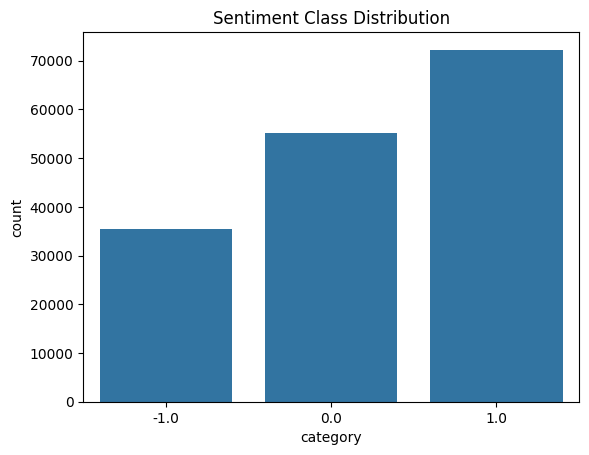

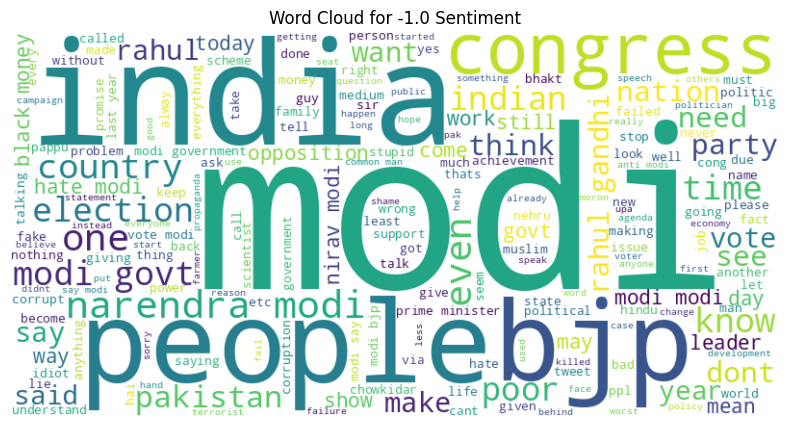

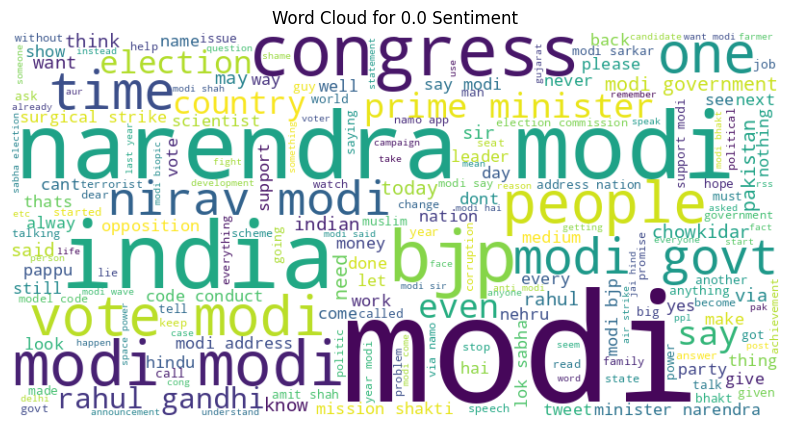

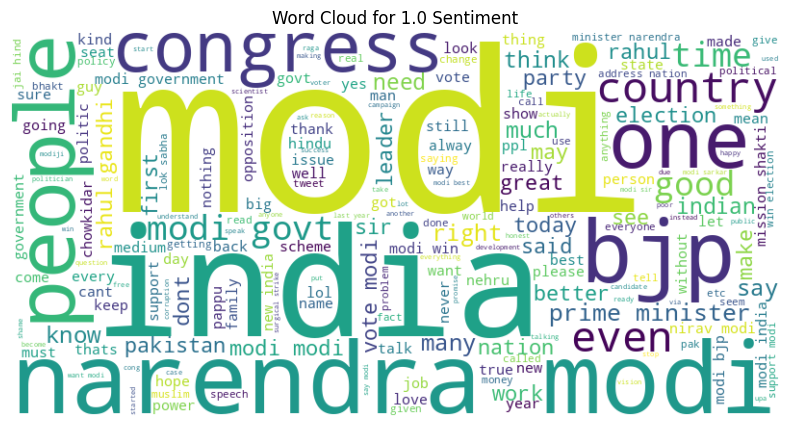

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Download the required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab') # This line is added to download the missing resource

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\\S+|www\\S+|https\\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from hashtags
    text = re.sub(r'\\@\\w+|\\#','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

# Create a copy of the DataFrame to avoid modifying the original
df_processed = df.copy()

# Assuming 'clean_text' is the intended column, change 'text' to 'clean_text'
# If the original text column is named differently, replace 'clean_text' with that name.
df_processed['clean_text'] = df_processed['clean_text'].apply(preprocess_text)
sns.countplot(x='category', data=df_processed) # Changed 'sentiment' to 'category'
plt.title('Sentiment Class Distribution')
plt.show()


#clouds
for sentiment in df_processed['category'].unique(): # Changed 'sentiment' to 'category'
    text = ' '.join(df_processed[df_processed['category'] == sentiment]['clean_text']) # Changed 'sentiment' to 'category'
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
df['category'] = df['category'].replace({-1: 0, 0: 1, 1: 2})
X = df['clean_text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for model_name, model in models.items():
    print(f"\\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))



\nTraining Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.91      0.42      0.57      7152
         1.0       0.88      0.66      0.76     11067
         2.0       0.65      0.95      0.77     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594

Confusion Matrix for Naive Bayes:
[[ 2974   534  3644]
 [   92  7349  3626]
 [  207   485 13683]]
\nTraining SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89      7152
         1.0       0.95      0.98      0.96     11067
         2.0       0.95      0.95      0.95     14375

    accuracy                           0.94     32594
   macro avg       0.94      0.93      0.93     32594
weighted avg       0.94      0.94      0.94     32594

Confusion Matrix for SVM:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:20:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78      7152
         1.0       0.80      0.98      0.88     11067
         2.0       0.92      0.87      0.89     14375

    accuracy                           0.87     32594
   macro avg       0.87      0.85      0.85     32594
weighted avg       0.87      0.87      0.86     32594

Confusion Matrix for XGBoost:
[[ 4921  1293   938]
 [   74 10847   146]
 [  484  1411 12480]]


Accuracy: 0.87
Precision (weighted): 0.87
Recall (weighted): 0.87
F1 Score (weighted): 0.86
Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.69      0.78      7152
     Neutral       0.80      0.98      0.88     11067
    Positive       0.92      0.87      0.89     14375

    accuracy                           0.87     32594
   macro avg       0.87      0.85      0.85     32594
weighted avg       0.87      0.87      0.86     32594



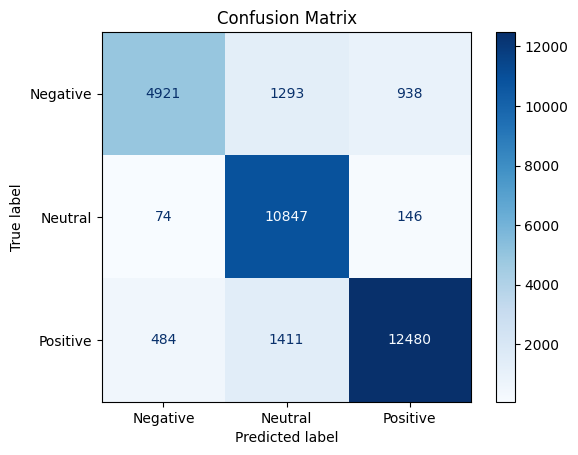

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"F1 Score (weighted): {f1:.2f}")

# Generate a detailed classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'], zero_division=0)
print("Classification Report:\n", report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


Train shape: (6920, 2)
Test shape: (1821, 2)


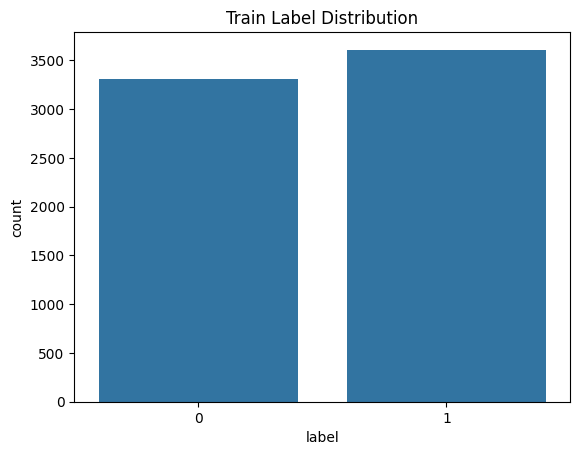

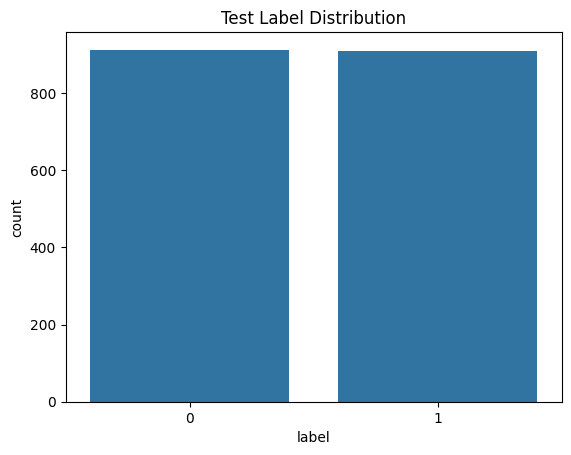

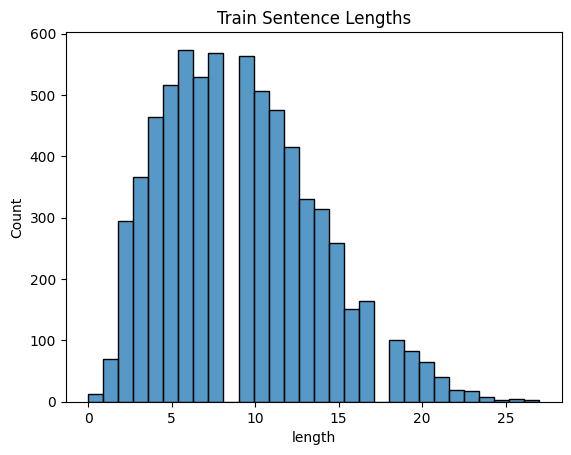


Training SVM...
SVM - CV Accuracy: 0.7688 ± 0.0191

Training KNN...
KNN - CV Accuracy: 0.5112 ± 0.0186

Training Decision Tree...
Decision Tree - CV Accuracy: 0.6609 ± 0.0133

Training Random Forest...
Random Forest - CV Accuracy: 0.7126 ± 0.0133

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - CV Accuracy: 0.6906 ± 0.0232

=== SVM Final Evaluation ===
Accuracy: 0.7946183415705657
Precision: 0.7677677677677678
Recall: 0.8437843784378438
F1 Score: 0.8039832285115304
              precision    recall  f1-score   support

           0       0.83      0.75      0.78       912
           1       0.77      0.84      0.80       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821


=== KNN Final Evaluation ===
Accuracy: 0.5200439319055464
Precision: 0.5332068311195446
Recall: 0.30913091309130913
F1 Score: 0.39136490250696376
              precision    recall  f1-score   support

           0       0.51      0.73      0.60       912
           1       0.53      0.31      0.39       909

    accuracy                           0.52      1821
   macro avg       0.52      0.52      0.50      1821
weighted avg       0.52      0.52      0.50      1821


=== Decision T

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6941241076331686
Precision: 0.6538461538461539
Recall: 0.8228822882288229
F1 Score: 0.7286897223575256
              precision    recall  f1-score   support

           0       0.76      0.57      0.65       912
           1       0.65      0.82      0.73       909

    accuracy                           0.69      1821
   macro avg       0.71      0.69      0.69      1821
weighted avg       0.71      0.69      0.69      1821



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load data
def load_stsa_file(filepath):
    data = []
    with open(filepath, 'r') as f:
        for line in f:
            if line.strip():
                label, text = int(line[0]), line[2:].strip()
                data.append((label, text))
    return pd.DataFrame(data, columns=["label", "text"])

train_df = load_stsa_file("stsa-train.txt")
test_df = load_stsa_file("stsa-test.txt")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

# Clean text function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [w for w in tokens if w not in ENGLISH_STOP_WORDS]  # Remove stopwords
    return " ".join(tokens)

train_df['clean_text'] = train_df['text'].fillna('').astype(str).apply(preprocess)
test_df['clean_text'] = test_df['text'].fillna('').astype(str).apply(preprocess)

# Class distribution
sns.countplot(x='label', data=train_df)
plt.title("Train Label Distribution")
plt.show()

sns.countplot(x='label', data=test_df)
plt.title("Test Label Distribution")
plt.show()

# Sentence lengths
train_df['length'] = train_df['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(train_df['length'], bins=30)
plt.title("Train Sentence Lengths")
plt.show()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(train_df['clean_text'])
X_test_vec = vectorizer.transform(test_df['clean_text'])

y_train = train_df['label']
y_test = test_df['label']

# Train-Test Split (80% training, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_vec, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Define models
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Cross-validation setup (10 folds)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Train models with 10-fold cross-validation
for name, model in models.items():
    print(f"\nTraining {name}...")
    scores = cross_val_score(model, X_train_split, y_train_split, cv=cv, scoring='accuracy')
    print(f"{name} - CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Final evaluation on test data
for name, model in models.items():
    print(f"\n=== {name} Final Evaluation ===")
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)

    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
    print(classification_report(y_test, preds))


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
!pip install --force-reinstall numpy==1.24.4 gensim==4.3.0

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached gensim-4.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached FuzzyTM-2.0.9-py3-none-any.whl.metadata (7.9 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pyFUME-0.3.4-py3-none-any.whl.metadata (9.7 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.10.1-cp

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


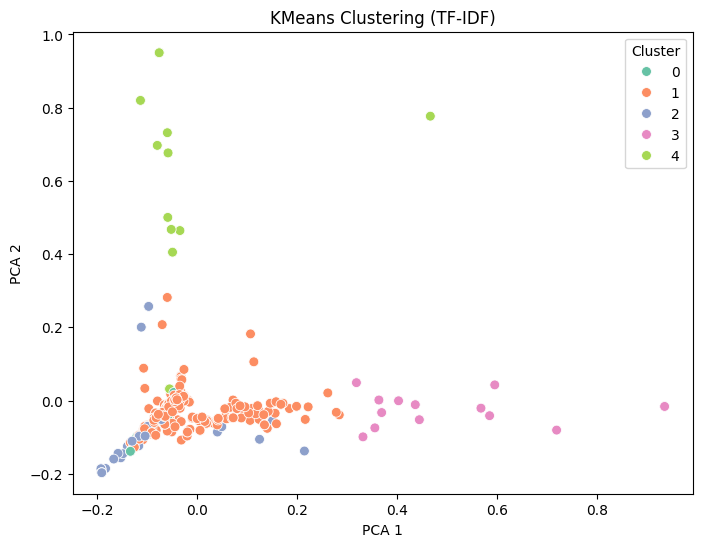

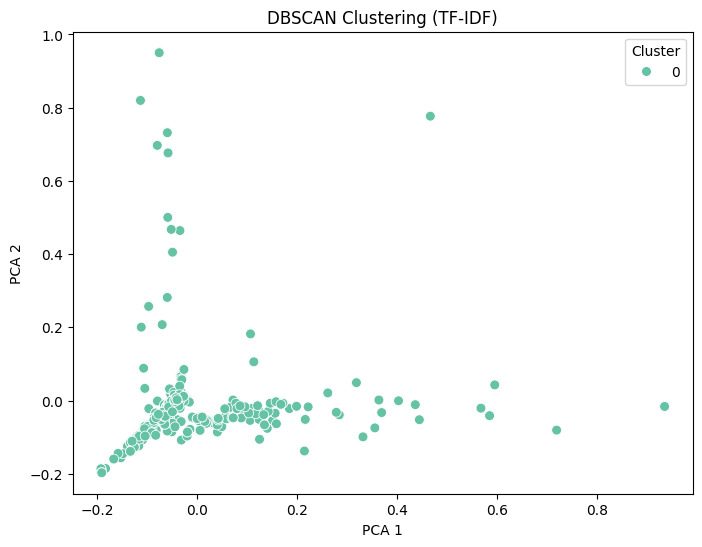

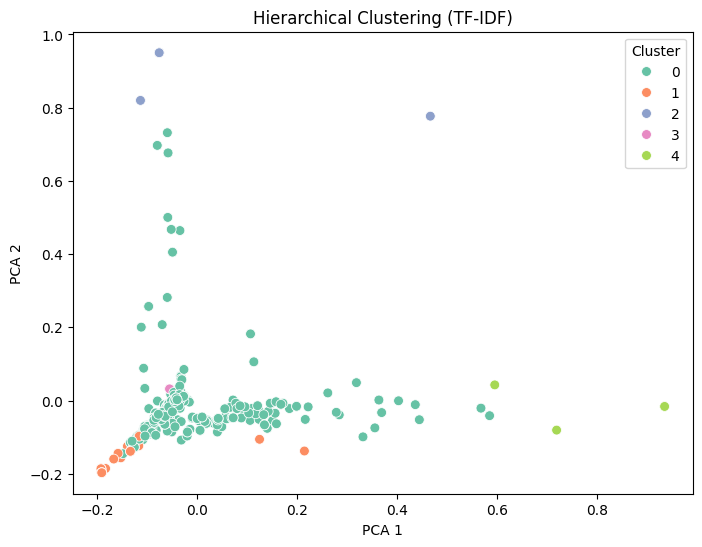

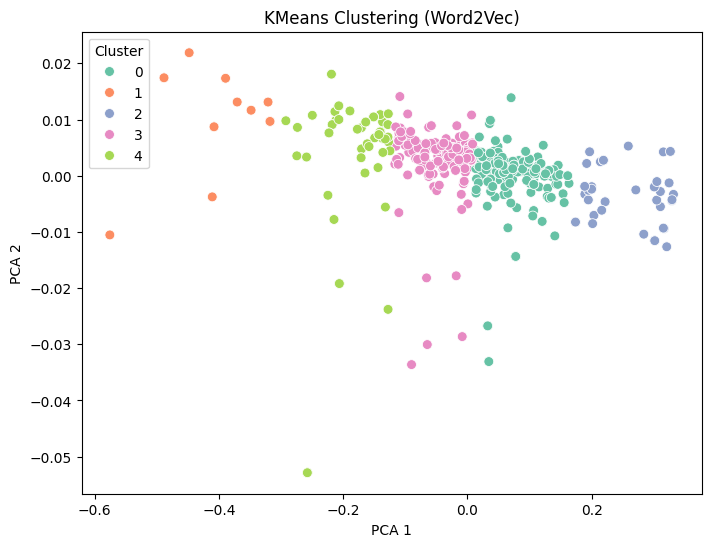

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from gensim.models import Word2Vec

# Load dataset
file_path = '/content/Amazon_Unlocked_Mobile.csv'
df = pd.read_csv(file_path)

# Keep only 'Reviews' and drop missing values
df = df[['Reviews']].dropna().reset_index(drop=True)
df = df[:500]  # Limit for performance

# Text preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned'] = df['Reviews'].apply(preprocess)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['cleaned']).toarray()

# --- Clustering on TF-IDF features ---
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)

dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_tfidf)

hier = AgglomerativeClustering(n_clusters=5)
hier_labels = hier.fit_predict(X_tfidf)

# --- Visualization function ---
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels, palette='Set2', s=50)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Cluster", loc='best')
    plt.show()

# Visualize TF-IDF clusters
plot_clusters(X_tfidf, kmeans_labels, "KMeans Clustering (TF-IDF)")
plot_clusters(X_tfidf, dbscan_labels, "DBSCAN Clustering (TF-IDF)")
plot_clusters(X_tfidf, hier_labels, "Hierarchical Clustering (TF-IDF)")

# ----------- Word2Vec Section -----------
# Prepare tokenized data
sentences = [word_tokenize(text) for text in df['cleaned']]

# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, seed=42)

# Function to compute average word2vec for each sentence
def get_w2v_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

# Apply to all rows
X_w2v = np.array([get_w2v_vector(tokens) for tokens in sentences])

# --- Clustering on Word2Vec features ---
w2v_kmeans = KMeans(n_clusters=5, random_state=42)
w2v_kmeans_labels = w2v_kmeans.fit_predict(X_w2v)

# --- Visualization ---
plot_clusters(X_w2v, w2v_kmeans_labels, "KMeans Clustering (Word2Vec)")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**
Although K-means clustering implies spherical clusters, which may not always reflect the actual data structure, it yielded well-defined and reasonably balanced clusters, particularly when TF-IDF characteristics were included.  Though it was sensitive to parameter settings and had trouble with high-dimensional sparse data like TF-IDF, DBSCAN, a density-based technique, was successful in spotting outliers and clusters of different forms.  Although hierarchical clustering can be computationally costly and less scalable, it worked rather well and provided a clear perspective of layered cluster interactions.  Compared to raw TF-IDF, Word2Vec-based clustering produced more relevant clusters and enhanced semantic understanding by capturing contextual similarities between words, particularly for reviews with comparable sentiments.Despite being more computationally demanding.BERT embeddings produced the most logical and semantically rich groups by utilizing deep contextual representations to further improve clustering quality.  In terms of semantic clustering, BERT fared better overall than other approaches, whereas more conventional techniques like K-means and hierarchical were quicker and easier to understand but less sophisticated.
.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

